In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# access Google Drive file
# Doit être partagé en lecture et écriture aux différents colaborateurs 

url = 'https://drive.google.com/file/d/1H2JLuuZnXldqgZdkLYFegiJQhl2dujko/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

## Exploration Dataset

In [3]:
# aperçu du dataset
df.head()

,date_transaction,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,prix,adresse,commune,latitude,longitude,date_construction,anciennete
0,2019-10-31,ancien,maison,5,100.0,NaN,247.0,0,530000.0,6 PAS DES ANTONINS,Villeurbanne,45.781673,4.879333,2003-06-11 11:38:24,16.387783
1,2018-11-26,ancien,maison,2,52.0,NaN,156.0,0,328550.0,12 RUE DU LUIZET,Villeurbanne,45.783240,4.884683,2003-06-11 11:38:24,15.459633
2,2016-08-04,ancien,appartement,1,28.0,28.2,0.0,1,42500.0,4 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.148839
3,2016-11-18,ancien,appartement,3,67.0,66.3,0.0,1,180900.0,6 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.439058
4,2016-12-16,ancien,appartement,1,28.0,NaN,0.0,1,97000.0,163 AV ROGER SALENGRO,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.515719


In [4]:
# Statistiques descriptives par colonne
df.describe(include="all")

,date_transaction,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,prix,adresse,commune,latitude,longitude,date_construction,anciennete
count,40516,40516,40516,40516.000000,40516.000000,26025.000000,40516.000000,40516.000000,4.051600e+04,40179,40516,40373.000000,40373.000000,40516,40516.000000
unique,1396,2,2,NaN,NaN,NaN,NaN,NaN,NaN,11294,10,NaN,NaN,826,NaN
top,2017-12-29,ancien,appartement,NaN,NaN,NaN,NaN,NaN,NaN,93 RUE ANDRE BOLLIER,Villeurbanne,NaN,NaN,1990-01-01 00:00:00,NaN
freq,130,35562,39832,NaN,NaN,NaN,NaN,NaN,NaN,186,10330,NaN,NaN,20427,NaN
mean,NaN,NaN,NaN,2.792354,65.240251,63.528370,3.764587,0.599319,2.557589e+05,NaN,NaN,45.759185,4.852142,NaN,21.246938
std,NaN,NaN,NaN,1.180324,28.224352,26.386168,36.446308,0.601396,1.544933e+05,NaN,NaN,0.015053,0.029956,NaN,9.397379
min,NaN,NaN,NaN,1.000000,20.000000,2.810000,0.000000,0.000000,2.400000e+04,NaN,NaN,45.722048,4.773162,NaN,-3.853563
25%,NaN,NaN,NaN,2.000000,45.000000,44.700000,0.000000,0.000000,1.552725e+05,NaN,NaN,45.748925,4.831072,NaN,15.064690
50%,NaN,NaN,NaN,3.000000,63.000000,62.800000,0.000000,1.000000,2.200000e+05,NaN,NaN,45.759559,4.854009,NaN,26.571388
75%,NaN,NaN,NaN,4.000000,80.000000,78.110000,0.000000,1.000000,3.090000e+05,NaN,NaN,45.770456,4.875617,NaN,28.775403


In [5]:
# structure dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40516 entries, 0 to 40515
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date_transaction         40516 non-null  object 
 1   type_achat               40516 non-null  object 
 2   type_bien                40516 non-null  object 
 3   nombre_pieces            40516 non-null  int64  
 4   surface_logement         40516 non-null  float64
 5   surface_carrez_logement  26025 non-null  float64
 6   surface_terrain          40516 non-null  float64
 7   nombre_parkings          40516 non-null  int64  
 8   prix                     40516 non-null  float64
 9   adresse                  40179 non-null  object 
 10  commune                  40516 non-null  object 
 11  latitude                 40373 non-null  float64
 12  longitude                40373 non-null  float64
 13  date_construction        40516 non-null  object 
 14  anciennete            

In [6]:
# get number of missing values
df.isna().sum()

date_transaction               0
type_achat                     0
type_bien                      0
nombre_pieces                  0
surface_logement               0
surface_carrez_logement    14491
surface_terrain                0
nombre_parkings                0
prix                           0
adresse                      337
commune                        0
latitude                     143
longitude                    143
date_construction              0
anciennete                     0
dtype: int64

In [7]:
# nombre de biens par commune
df['commune'].value_counts()

Villeurbanne               10330
Lyon 3e Arrondissement      5974
Lyon 7e Arrondissement      5289
Lyon 8e Arrondissement      4626
Lyon 9e Arrondissement      3342
Lyon 5e Arrondissement      2934
Lyon 6e Arrondissement      2451
Lyon 4e Arrondissement      2292
Lyon 1er Arrondissement     1823
Lyon 2e Arrondissement      1455
Name: commune, dtype: int64

In [8]:
mean_per_commune = df.groupby(["commune"]).mean()
mean_per_commune

,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,prix,latitude,longitude,anciennete
commune,,,,,,,,,
Lyon 1er Arrondissement,2.438837,65.351618,60.237133,0.345584,0.111903,291653.223396,45.769898,4.831334,27.399613
Lyon 2e Arrondissement,2.629553,73.108591,67.107836,0.000000,0.216495,359737.269718,45.752554,4.827978,24.920508
Lyon 3e Arrondissement,2.705892,65.449950,62.746541,7.326749,0.640442,273628.312857,45.754327,4.866129,25.287805
Lyon 4e Arrondissement,2.938045,72.143979,67.867643,4.380454,0.497382,332653.728010,45.778092,4.827497,25.063470
Lyon 5e Arrondissement,3.119973,71.428766,68.163324,3.891616,0.650988,250540.020382,45.756218,4.801589,23.403405
Lyon 6e Arrondissement,2.888209,77.096695,73.966886,0.419013,0.397797,395286.337980,45.768896,4.851903,27.372850
Lyon 7e Arrondissement,2.584988,59.771601,59.796187,0.817546,0.633768,248164.669155,45.742768,4.840709,21.294647
Lyon 8e Arrondissement,2.789883,61.942283,61.269627,5.073065,0.756809,228460.846706,45.736642,4.867609,22.986062
Lyon 9e Arrondissement,2.932974,65.531718,64.442202,1.728007,0.646020,218814.217026,45.779965,4.806478,22.066654


In [9]:
# Prix moyen par commune - all
df_prix = pd.DataFrame({'commune': df["commune"], 'prix': df["prix"]})
prix_commune = df_prix.groupby(["commune"]).mean().apply(np.int64)
prix_commune

,prix
commune,
Lyon 1er Arrondissement,291653
Lyon 2e Arrondissement,359737
Lyon 3e Arrondissement,273628
Lyon 4e Arrondissement,332653
Lyon 5e Arrondissement,250540
Lyon 6e Arrondissement,395286
Lyon 7e Arrondissement,248164
Lyon 8e Arrondissement,228460
Lyon 9e Arrondissement,218814


In [10]:
#Création de 2 colonnes year, month 
df['date_transaction']= pd.to_datetime(df['date_transaction']) 

df.insert(loc = 1, column = 'Annee_vente', value = df['date_transaction'].dt.year)
df.insert(loc = 2, column = 'Mois', value = df['date_transaction'].dt.month)

In [11]:
df["date_construction"].value_counts()

1990-01-01 00:00:00    20427
2003-06-11 11:38:24     8514
2021-03-13 11:38:24      225
1996-11-30 11:38:24      219
2020-06-10 11:38:24      193
                       ...  
2018-07-11 11:38:24        1
2017-12-13 11:38:24        1
2001-12-26 11:38:24        1
2014-02-19 11:38:24        1
2005-01-28 11:38:24        1
Name: date_construction, Length: 826, dtype: int64

In [12]:
df.columns

Index(['date_transaction', 'Annee_vente', 'Mois', 'type_achat', 'type_bien',
       'nombre_pieces', 'surface_logement', 'surface_carrez_logement',
       'surface_terrain', 'nombre_parkings', 'prix', 'adresse', 'commune',
       'latitude', 'longitude', 'date_construction', 'anciennete'],
      dtype='object')

## EDA

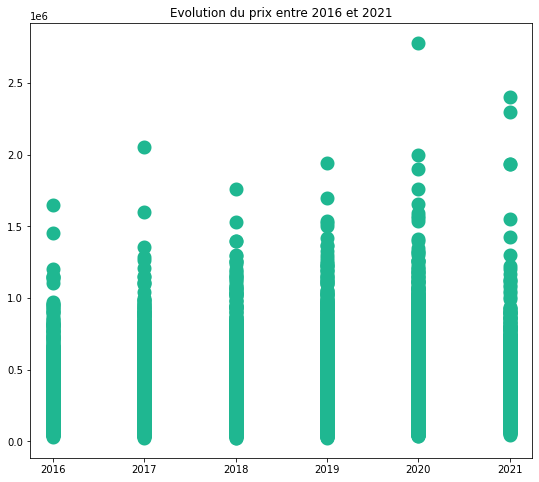

In [13]:
# EDA - Prix par année 
x = [df["Annee_vente"]]
y = [df["prix"]]

plt.figure(figsize=(9, 8))
plt.scatter(x, y, linewidths=8, c="#1fb791")
plt.title("Evolution du prix entre 2016 et 2021")
plt.show()

In [14]:
#prix_commune = df.groupby(['commune']).value_counts().apply(np.int64)

df_prix = pd.DataFrame({'commune': df["commune"], 'prix': df["prix"]})
nb_bien = df_prix["commune"].value_counts()
commune = df_prix.groupby('commune').count()

In [15]:
commune = commune.sort_values(by="prix",ascending=False)

<AxesSubplot:title={'center':'Nombre de bien vendus par commune'}, xlabel='commune'>

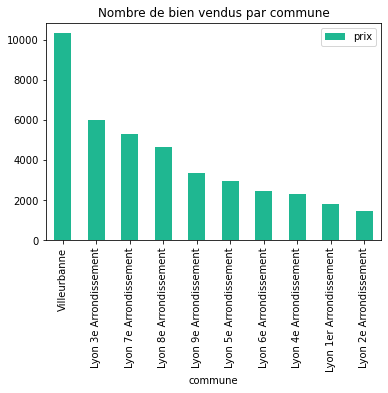

In [16]:
commune.plot(kind="bar", color='#1fb791', title='Nombre de bien vendus par commune')

<AxesSubplot:>

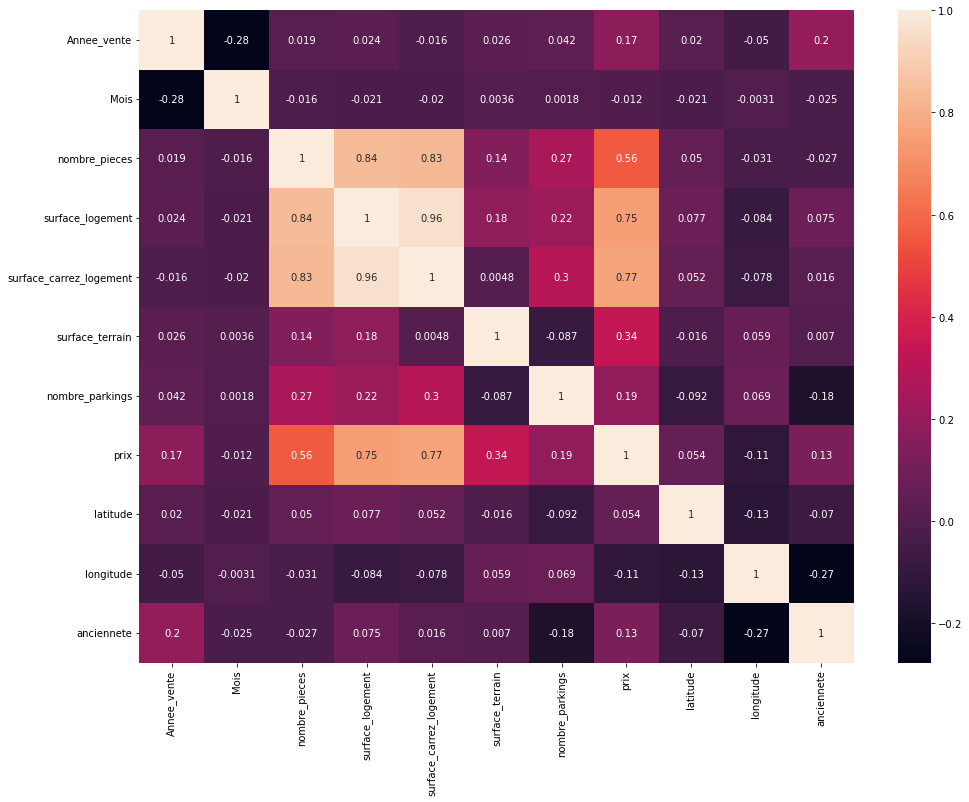

In [17]:
corr_df = df.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(corr_df, annot=True)

In [18]:
df_prix.head()

,commune,prix
0,Villeurbanne,530000.0
1,Villeurbanne,328550.0
2,Villeurbanne,42500.0
3,Villeurbanne,180900.0
4,Villeurbanne,97000.0


<AxesSubplot:title={'center':'Prix de vente moyen par commune'}, xlabel='commune'>

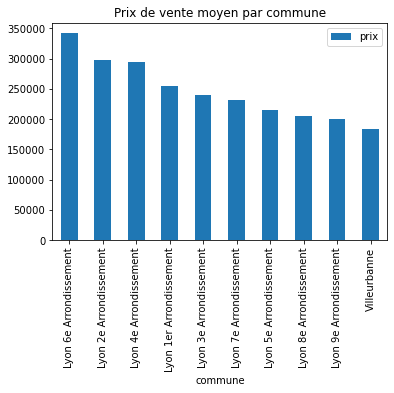

In [19]:
df_prix = df_prix.groupby(["commune"]).median()
df_prix = df_prix.sort_values(by="prix",ascending=False)
df_prix.plot(kind="bar", title ="Prix de vente moyen par commune")

<AxesSubplot:title={'center':'Prix moyen du m2 par commune'}, xlabel='commune'>

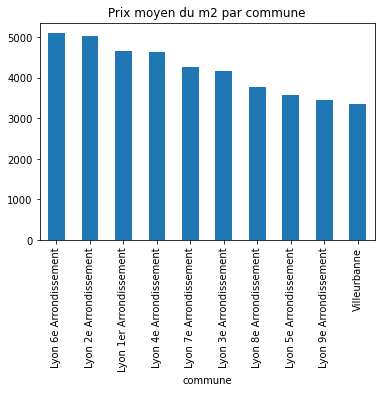

In [20]:
prix_m2 = df["prix"]/df["surface_logement"]
prix_m2_commune = prix_m2.groupby(df["commune"]).mean()
prix_m2_commune = prix_m2_commune.sort_values(ascending=False)
prix_m2_commune.plot(kind="bar", title="Prix moyen du m2 par commune")

<AxesSubplot:title={'center':'Surface moyenne par commune'}, xlabel='commune'>

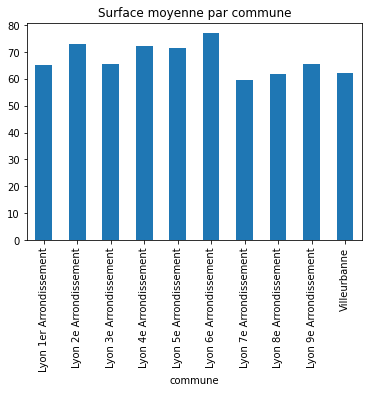

In [21]:
surface_moyenne = df["surface_logement"].groupby(df["commune"]).mean()
surface_moyenne.plot(kind="bar", title="Surface moyenne par commune")

In [22]:
# retrait de colonnes considérées inutiles à l'objectif
df = df.drop(['date_transaction', 'surface_carrez_logement', 'adresse','anciennete'], axis = 1)

In [23]:
df.head()

,Annee_vente,Mois,type_achat,type_bien,nombre_pieces,surface_logement,surface_terrain,nombre_parkings,prix,commune,latitude,longitude,date_construction
0,2019,10,ancien,maison,5,100.0,247.0,0,530000.0,Villeurbanne,45.781673,4.879333,2003-06-11 11:38:24
1,2018,11,ancien,maison,2,52.0,156.0,0,328550.0,Villeurbanne,45.783240,4.884683,2003-06-11 11:38:24
2,2016,8,ancien,appartement,1,28.0,0.0,1,42500.0,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24
3,2016,11,ancien,appartement,3,67.0,0.0,1,180900.0,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24
4,2016,12,ancien,appartement,1,28.0,0.0,1,97000.0,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24


In [24]:
#Remplacement de la colonne 'date_construction' par une colonne 'annee_construction' au format YYYY 

df['date_construction']= pd.to_datetime(df['date_construction']) 

df.insert(loc = 1, column = 'Annee_construction', value = df['date_construction'].dt.year)
df = df.drop(["date_construction"], axis = 1)

In [25]:
df.head(1)

,Annee_vente,Annee_construction,Mois,type_achat,type_bien,nombre_pieces,surface_logement,surface_terrain,nombre_parkings,prix,commune,latitude,longitude
0,2019,2003,10,ancien,maison,5,100.0,247.0,0,530000.0,Villeurbanne,45.781673,4.879333


In [26]:
# displaying the datatypes
display(df.dtypes)

Annee_vente             int64
Annee_construction      int64
Mois                    int64
type_achat             object
type_bien              object
nombre_pieces           int64
surface_logement      float64
surface_terrain       float64
nombre_parkings         int64
prix                  float64
commune                object
latitude              float64
longitude             float64
dtype: object

In [27]:
# converting 'surface_logement', 'surface_terrain' and 'prix' from float to int
df['surface_logement'] = df['surface_logement'].apply(np.int64)
df['surface_terrain'] = df['surface_terrain'].apply(np.int64)
df['prix'] = df['prix'].apply(np.int64)
  
display(df.dtypes)

Annee_vente             int64
Annee_construction      int64
Mois                    int64
type_achat             object
type_bien              object
nombre_pieces           int64
surface_logement        int64
surface_terrain         int64
nombre_parkings         int64
prix                    int64
commune                object
latitude              float64
longitude             float64
dtype: object

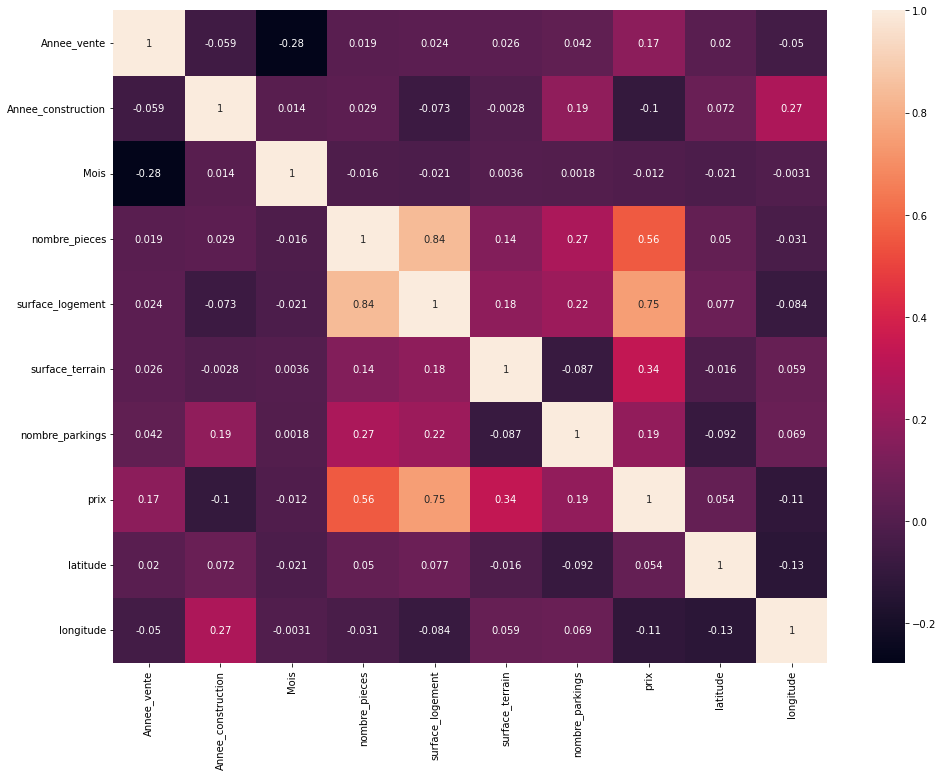

In [28]:
corr_df = df.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(corr_df, annot=True)
plt.show()

In [29]:
# Normalisation des latitudes 

list_latitude = []

for commune in df["commune"]:
  if commune == 'Villeurbanne':
    list_latitude.append(45.7662954)
  elif commune == 'Lyon 1er Arrondissement':
    list_latitude.append(45.7694158)
  elif commune == 'Lyon 2e Arrondissement':
    list_latitude.append(45.751953125)
  elif commune == 'Lyon 3e Arrondissement':
    list_latitude.append(45.76032257080078)
  elif commune == 'Lyon 4e Arrondissement':
    list_latitude.append(45.774195)
  elif commune == 'Lyon 5e Arrondissement':
    list_latitude.append(45.7573809)
  elif commune == 'Lyon 6e Arrondissement':
    list_latitude.append(45.7683968)
  elif commune == 'Lyon 7e Arrondissement':
    list_latitude.append(45.7460481)
  elif commune == 'Lyon 8e Arrondissement':
    list_latitude.append(45.730583)
  else:
    list_latitude.append(45.7739471)

df['Latitude'] = list_latitude

In [30]:
df[df["commune"]=='Lyon 9e Arrondissement']

,Annee_vente,Annee_construction,Mois,type_achat,type_bien,nombre_pieces,surface_logement,surface_terrain,nombre_parkings,prix,commune,latitude,longitude,Latitude
37174,2021,1990,1,ancien,appartement,2,38,0,1,217900,Lyon 9e Arrondissement,45.804346,4.834998,45.773947
37175,2017,2011,2,ancien,appartement,5,94,0,2,138000,Lyon 9e Arrondissement,45.802867,4.836781,45.773947
37176,2019,2011,8,ancien,appartement,3,66,0,1,113000,Lyon 9e Arrondissement,45.802867,4.836781,45.773947
37177,2019,2011,9,ancien,appartement,5,94,0,1,230000,Lyon 9e Arrondissement,45.802867,4.836781,45.773947
37178,2020,2011,7,ancien,appartement,5,94,0,1,128900,Lyon 9e Arrondissement,45.802867,4.836781,45.773947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40511,2020,2013,1,ancien,appartement,2,34,0,1,226000,Lyon 9e Arrondissement,45.802189,4.826120,45.773947
40512,2020,2013,4,ancien,appartement,2,33,0,0,217300,Lyon 9e Arrondissement,45.802189,4.826120,45.773947
40513,2020,2013,4,ancien,appartement,2,23,0,0,145000,Lyon 9e Arrondissement,45.802189,4.826120,45.773947
40514,2020,2013,4,ancien,appartement,2,34,0,0,206000,Lyon 9e Arrondissement,45.802189,4.826120,45.773947


In [31]:
# Normalisation des longitudes 

list_long = []

for commune in df["commune"]:
  if commune == 'Villeurbanne':
    list_long.append(4.8796622)
  elif commune == 'Lyon 1er Arrondissement':
    list_long.append(4.8300276)
  elif commune == 'Lyon 2e Arrondissement':
    list_long.append(4.826279163360596)
  elif commune == 'Lyon 3e Arrondissement':
    list_long.append(4.849698066711426)
  elif commune == 'Lyon 4e Arrondissement':
    list_long.append(4.827882)
  elif commune == 'Lyon 5e Arrondissement':
    list_long.append(4.8007715)
  elif commune == 'Lyon 6e Arrondissement':
    list_long.append(4.8493863)
  elif commune == 'Lyon 7e Arrondissement':
    list_long.append(4.8417503)
  elif commune == 'Lyon 8e Arrondissement':
    list_long.append(4.8870832)
  else:
    list_long.append(4.8069094)

df['Longitude'] = list_long

In [32]:
df = df.drop(['latitude', 'longitude'], axis = 1)

## Machine Learning

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, GridSearchCV

In [34]:
df.head()

,Annee_vente,Annee_construction,Mois,type_achat,type_bien,nombre_pieces,surface_logement,surface_terrain,nombre_parkings,prix,commune,Latitude,Longitude
0,2019,2003,10,ancien,maison,5,100,247,0,530000,Villeurbanne,45.766295,4.879662
1,2018,2003,11,ancien,maison,2,52,156,0,328550,Villeurbanne,45.766295,4.879662
2,2016,2003,8,ancien,appartement,1,28,0,1,42500,Villeurbanne,45.766295,4.879662
3,2016,2003,11,ancien,appartement,3,67,0,1,180900,Villeurbanne,45.766295,4.879662
4,2016,2003,12,ancien,appartement,1,28,0,1,97000,Villeurbanne,45.766295,4.879662


In [35]:
#Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in df.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Annee_vente', 'Annee_construction', 'Mois', 'nombre_pieces', 'surface_logement', 'surface_terrain', 'nombre_parkings', 'prix', 'Latitude', 'Longitude']
Found categorical features  ['type_achat', 'type_bien', 'commune']


## LinearRegression

In [36]:
features_list = ['Annee_vente', 'Annee_construction', 'Mois', 'type_achat', 'type_bien', 'nombre_pieces', 
                 'surface_logement', 'surface_terrain','nombre_parkings', 'commune']

target = ["prix"]
X = df.loc[:,features_list]
y = df.loc[:,target]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)
numeric_features = [0, 1, 2, 5, 6, 7, 8 ]
numeric_transformer = StandardScaler()

categorical_features = [3, 4, 9]
categorical_transformer = OneHotEncoder()

feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
X_test = feature_encoder.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
                                                    
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [37]:
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

R2 score on training set :  0.7378479327274443
R2 score on test set :  0.7508578511490449


In [38]:
print("coefficients are: ", regressor.coef_) 
print("Constant is: ", regressor.intercept_)

coefficients are:  [[-1.39626816e+17 -1.39626816e+17 -1.64066404e+17 -1.64066404e+17
   6.17368799e+17  6.17368799e+17  6.17368799e+17  6.17368799e+17
   6.17368799e+17  6.17368799e+17  6.17368799e+17  6.17368799e+17
   6.17368799e+17  6.17368799e+17  2.95038969e+04  2.42634749e+02
   6.36332441e+03 -2.08260000e+04  1.19748000e+05  3.74220000e+04
   1.25840000e+04]]
Constant is:  [-3.13675579e+17]


In [39]:
print("All transformers are: ", feature_encoder.transformers_)
categorical_column_names = feature_encoder.transformers_[0][1].categories_
categorical_column_names = np.concatenate((categorical_column_names))
print("Categorical columns are: ", categorical_column_names)
numerical_column_names = X.iloc[:, numeric_features].columns
print("numerical columns are: ", numerical_column_names)
all_column_names = np.append(categorical_column_names, numerical_column_names)
all_column_names

All transformers are:  [('cat', OneHotEncoder(), [3, 4, 9]), ('num', StandardScaler(), [0, 1, 2, 5, 6, 7, 8])]
Categorical columns are:  ['VEFA' 'ancien' 'appartement' 'maison' 'Lyon 1er Arrondissement'
 'Lyon 2e Arrondissement' 'Lyon 3e Arrondissement'
 'Lyon 4e Arrondissement' 'Lyon 5e Arrondissement'
 'Lyon 6e Arrondissement' 'Lyon 7e Arrondissement'
 'Lyon 8e Arrondissement' 'Lyon 9e Arrondissement' 'Villeurbanne']
numerical columns are:  Index(['Annee_vente', 'Annee_construction', 'Mois', 'nombre_pieces',
       'surface_logement', 'surface_terrain', 'nombre_parkings'],
      dtype='object')


array(['VEFA', 'ancien', 'appartement', 'maison',
       'Lyon 1er Arrondissement', 'Lyon 2e Arrondissement',
       'Lyon 3e Arrondissement', 'Lyon 4e Arrondissement',
       'Lyon 5e Arrondissement', 'Lyon 6e Arrondissement',
       'Lyon 7e Arrondissement', 'Lyon 8e Arrondissement',
       'Lyon 9e Arrondissement', 'Villeurbanne', 'Annee_vente',
       'Annee_construction', 'Mois', 'nombre_pieces', 'surface_logement',
       'surface_terrain', 'nombre_parkings'], dtype=object)

In [40]:
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": regressor.coef_.squeeze()
})

feature_importance.head()

,feature_names,coefficients
0,VEFA,-1.396268e+17
1,ancien,-1.396268e+17
2,appartement,-1.640664e+17
3,maison,-1.640664e+17
4,Lyon 1er Arrondissement,6.173688e+17


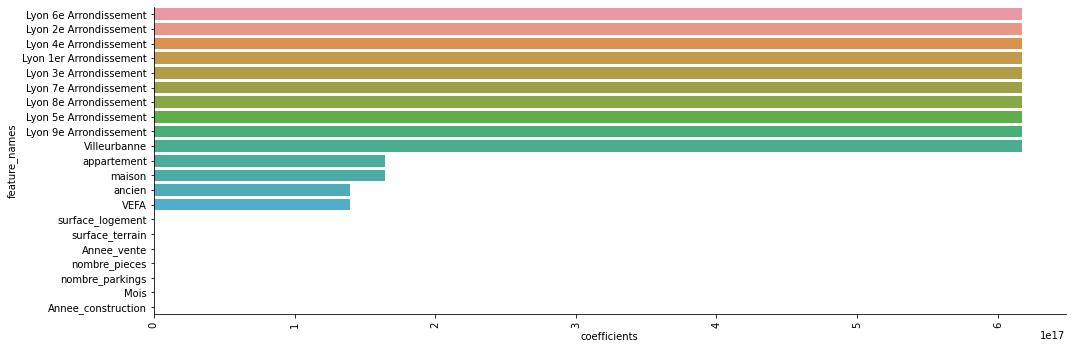

In [41]:
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

sns.catplot(y="feature_names", 
            x="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=30/10, orient = "h")

plt.xticks(rotation=90)
plt.show()

## RandomForestRegressor

In [42]:
target_distrib = df["prix"].value_counts()
print(target_distrib)

150000    331
160000    326
180000    310
120000    294
200000    282
         ... 
599500      1
314460      1
314550      1
286339      1
520100      1
Name: prix, Length: 10235, dtype: int64


<AxesSubplot:>

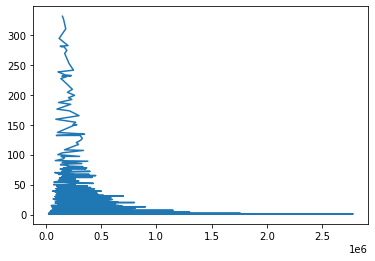

In [43]:
target_distrib.plot()

In [44]:
features_list = ['Annee_vente', 'Annee_construction', 'Mois', 'type_achat', 'type_bien',
       'nombre_pieces', 'surface_logement', 'surface_terrain',
       'nombre_parkings', 'commune']

X = df.loc[:,features_list] 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)
print("#### X_train BEFORE preprocessing ####")
print(X_train.head())

numeric_features = ['Annee_vente', 'Annee_construction', 'Mois', 'nombre_pieces', 'surface_logement', 'surface_terrain', 'nombre_parkings'] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = ['type_achat', 'type_bien', 'commune'] 
categorical_transformer = OneHotEncoder()

feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:])

#### X_train BEFORE preprocessing ####
       Annee_vente  Annee_construction  Mois type_achat    type_bien  \
15006         2020                1990     6     ancien  appartement   
16956         2018                1990     9     ancien       maison   
29877         2021                1990     5     ancien  appartement   
25913         2016                2009    10     ancien  appartement   
13036         2021                1990     6     ancien  appartement   

       nombre_pieces  surface_logement  surface_terrain  nombre_parkings  \
15006              2                49                0                1   
16956              2                60                0                0   
29877              2                49                0                1   
25913              3                68                0                1   
13036              4               110                0                2   

                      commune  
15006  Lyon 3e Arrondissement  
16956  

In [45]:
regressor = RandomForestRegressor(n_estimators=100,
                                  min_samples_split=15,
                                  max_depth=20,
                                  min_samples_leaf= 1,
                                  bootstrap=True,
                                  n_jobs=None,
                                  warm_start=True)
regressor.fit(X_train, y_train)

/tmp/ipykernel_63/1520810710.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_split=15, warm_start=True)

In [46]:
y_train_pred = regressor.predict(X_train)
print(y_train_pred[:5])

[240858.78373467 285498.39207674 245835.17903912 351043.41552124
 666730.57253124]


In [47]:
print(X_test)

       Annee_vente  Annee_construction  Mois type_achat    type_bien  \
24800         2020                2019     2     ancien  appartement   
5101          2019                2003     3     ancien  appartement   
35368         2018                1990    12     ancien  appartement   
15321         2020                1990     7     ancien  appartement   
15834         2018                1990     9       VEFA  appartement   
...            ...                 ...   ...        ...          ...   
27541         2018                1990     3     ancien  appartement   
35253         2018                1990     7     ancien  appartement   
30099         2017                2006    12     ancien  appartement   
30805         2017                1990     1     ancien  appartement   
28403         2018                1990     5     ancien  appartement   

       nombre_pieces  surface_logement  surface_terrain  nombre_parkings  \
24800              4                83                0    

In [48]:
X_test = feature_encoder.transform(X_test)
print(X_test[:5])

[[ 0.          1.          1.          0.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          1.24184524  2.41442907 -1.4192458   1.02753181
   0.63638221 -0.10469336  0.66917486]
 [ 0.          1.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.53563087  0.63761934 -1.12259409  1.02753181
   0.10155714 -0.10469336 -0.99475268]
 [ 0.          1.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.         -0.1705835  -0.80603856  1.54727135 -0.67067389
  -1.003748   -0.10469336 -0.99475268]
 [ 0.          1.          1.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          1.24184524 -0.80603856  0.06401278  0.17842896
  -0.32630292 -0.10469336 -0.99475268]
 [ 1.          0.   

In [49]:
y_test_pred = regressor.predict(X_test)
print(y_test_pred[:5])

[353172.70268941 171709.18005925 129644.52768086 252419.01962437
 360327.05273768]


In [50]:
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set     : ", regressor.score(X_test, y_test))

R2 score on training set :  0.8703614527983803
R2 score on test set     :  0.7934570267543175


In [51]:
categorical_column_names = feature_encoder.transformers_[0][1].categories_
categorical_column_names = np.concatenate((categorical_column_names))
print("Categorical columns are: ", categorical_column_names)
numerical_column_names = X.loc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)
all_column_names = np.append(categorical_column_names, numerical_column_names)
print("All columns name are: ", all_column_names)

Categorical columns are:  ['VEFA' 'ancien' 'appartement' 'maison' 'Lyon 1er Arrondissement'
 'Lyon 2e Arrondissement' 'Lyon 3e Arrondissement'
 'Lyon 4e Arrondissement' 'Lyon 5e Arrondissement'
 'Lyon 6e Arrondissement' 'Lyon 7e Arrondissement'
 'Lyon 8e Arrondissement' 'Lyon 9e Arrondissement' 'Villeurbanne']
numerical columns are:  Index(['Annee_vente', 'Annee_construction', 'Mois', 'nombre_pieces',
       'surface_logement', 'surface_terrain', 'nombre_parkings'],
      dtype='object')
All columns name are:  ['VEFA' 'ancien' 'appartement' 'maison' 'Lyon 1er Arrondissement'
 'Lyon 2e Arrondissement' 'Lyon 3e Arrondissement'
 'Lyon 4e Arrondissement' 'Lyon 5e Arrondissement'
 'Lyon 6e Arrondissement' 'Lyon 7e Arrondissement'
 'Lyon 8e Arrondissement' 'Lyon 9e Arrondissement' 'Villeurbanne'
 'Annee_vente' 'Annee_construction' 'Mois' 'nombre_pieces'
 'surface_logement' 'surface_terrain' 'nombre_parkings']


In [52]:
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":regressor.feature_importances_ # CAREFUL HERE. We need to access first index of our list because 
                                            # Data need to be 1 dimensional
                                            # That's what .squeeze()
})
print(regressor.feature_importances_)

[0.01111674 0.01142068 0.00192746 0.00215371 0.00479919 0.00868375
 0.00302409 0.00584404 0.00782019 0.0295678  0.00275049 0.00783797
 0.00997943 0.02463904 0.04740935 0.01774109 0.02124862 0.01273864
 0.68899405 0.06629978 0.0140039 ]


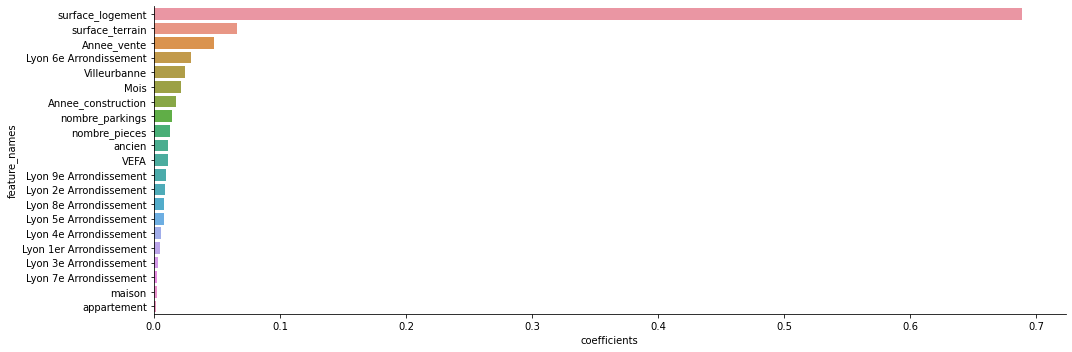

In [53]:
sns.catplot(y="feature_names", 
            x="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=30/10, orient = "h") # Resize graph